# Facebook Message Analyzer

<b> Current Features For a Given Chat: </b>
<ul> 
    <li> Number of Messages Sent </li> 
    <li> Messages Sent Over Time </li> 
    <li> Average Word Count </li>
</ul>

In [1]:
import os
import json
import numpy as np
import pylab as pl
import datetime

CURRENT_DIRECTORY = os.getcwd()
NUMBER_TO_ANALYZE = 5000
MESSAGE_THRESHOLD = 10
MESSAGE_BOUND = 100000

In [2]:
def get_json_data(chat):
    try:
        json_location = CURRENT_DIRECTORY + "/messages/" + chat + "/message_1.json"
        with open(json_location) as json_file:
            json_data = json.load(json_file)
            return json_data
    except IOError:
        pass # some things the directory aren't messages (DS_Store, stickers_used, etc.)

In [3]:
chats = os.listdir(CURRENT_DIRECTORY + "/messages/")[:NUMBER_TO_ANALYZE]
sorted_chats = []
final_data_messages = {}
final_data_times = {}
final_data_words = {}
invalid_message_count = 0

In [4]:
print('Analyzing ' + str(min(NUMBER_TO_ANALYZE, len(chats))) + ' chats...')

for chat in chats:
    url = chat + '/message_1.json'
    json_data = get_json_data(chat)
    print(chat)
    if json_data != None:
        messages = json_data["messages"]
        if len(messages) >= MESSAGE_THRESHOLD and len(messages) <= MESSAGE_BOUND:
            sorted_chats.append((len(messages), chat, messages))

sorted_chats.sort(reverse=True)

print('Finished processing chats...')

Analyzing 317 chats...
ElijahJoshandSelina_ivAjHaBPwg
JayHatkar_K66i_8faSw
annasivaraj_d2ngovq61g
deactivatedanddeletedshat31519_aiFWarLv7w
vanessaemmaestherand12others_l1zfxoaobg
marcmartinez_wgygok567w
sarahbowen_8ngjwqzdlq
suryanamboodiri_y2uwzgfopw
daranzhao_cl4lxz41pw
junulee_-i70zsrnew
suminchoi_cyqpvf02kg
filtered_threads
ChristineDavidKevinand10others_N9tTI6c0RA
shubhangaballal_s-kosyfxkq
elexiskalar_ajbve9l7kq
michaelyi_q8zkwr3peg
ginajennyandgrace_sr9bhn0hua
tjarora_rgwxmcaytq
nadiafreeman_tcu8_iwkvq
maisiesajbel_xt3-g8qhhw
elijahmichaeljoshand4others_6hj7ult3ha
dannyluo_cigfebktrw
message_requests
JoshKolenbrander_h_YBUGD67A
AndrewZhang_IWumrdUwlg
jessicawang_3jvgkuobwa
yingyanho_rgmn8cjjzw
peterjlu_hupgvb0fqa
laurenmangibin_nqe45_fkgg
zacschulwolf_r6chinfsvq
ericanddevanshi_gqizwghy0g
selinawu_ljykcqekga
andrewyu_uerz2vurga
arienwagen_e6dni5mhyw
kanoakelly_ntw3dwf19g
subikim_hfacw-mj3q
bestgroup_7fu-bqe7ja
katherinechacon_hrotd13utg
jessicayu_zoxiqv7wbg
varunsarahandjenny_0

In [5]:
for i, (messages, chat, messages) in enumerate(sorted_chats):
    number_messages = {}
    person_to_times = {}
    number_words = {}

    print(str(i) + " - " + str(len(messages)) + " messages - " + str(chat))

    for message in messages:
        try:
            name = message["sender_name"]
            time = message["timestamp_ms"]
            message_content = message["content"]

            number_messages[name] = number_messages.get(name, 0)
            number_messages[name] += 1

            person_to_times[name] = person_to_times.get(name, [])
            person_to_times[name].append(datetime.datetime.fromtimestamp(time/1000.0))

            number_words[name] = number_words.get(name, [])
            number_words[name].append(len(message_content.split()))
        except KeyError:
            # happens for special cases like users who deactivated, unfriended, blocked
            invalid_message_count += 1

    final_data_messages[i] = number_messages
    final_data_times[i] = person_to_times
    final_data_words[i] = number_words

print('Found ' + str(invalid_message_count) + ' invalid messages...')
print('Found ' + str(len(sorted_chats)) + ' chats with ' + str(MESSAGE_THRESHOLD) + ' messages or more')

0 - 30273 messages - SarahChieng_RTvL5y10Zg
1 - 8470 messages - AsherNoel_dn2gHVwUPw
2 - 4400 messages - HSMC19Comrades_9CHHTDuDyg
3 - 3585 messages - KevinBlack_pcg-yNJSaA
4 - 3365 messages - AndrewZhang_IWumrdUwlg
5 - 3047 messages - AngelaZhang_qvbHC3L66A
6 - 2697 messages - SciOCaptains_4x9jGverWA
7 - 2285 messages - deactivatedanddeletedshat31519_aiFWarLv7w
8 - 2259 messages - DevanshiGupta_sUpEUg1ziA
9 - 2090 messages - CatherineLi_oL6kguAAyw
10 - 1507 messages - JasmineHuang_R9lJShTUpg
11 - 1034 messages - Everwing_Lb6flqzaEg
12 - 865 messages - GraceZhang_W26JcLO_kg
13 - 859 messages - MichaelTaleff_rZGCnlh7iA
14 - 848 messages - golfclub218fullsenders_Bcswe_NfSQ
15 - 710 messages - hsmccampwide_WvDLELl9ow
16 - 645 messages - JennyLu_c5jqEurumQ
17 - 542 messages - ClaireZhou_hJIwlLaBCw
18 - 542 messages - BrianXu_-_95UOkDnQ
19 - 475 messages - 200JC_jczSzK8F4g
20 - 425 messages - AkhilAtluri_3KD4LJu5pg
21 - 423 messages - J-52xucR5Q
22 - 417 messages - ChristineDavidKevinand10o

In [6]:
def plot_num_messages(chat_number):
    plotted_data = final_data_messages[chat_number]
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Number of Messages Sent')
    pl.tight_layout()
    pl.show()
    
def plot_histogram_time(chat_number):
    person_to_times = final_data_times[chat_number]
    pl.xlabel('Time')
    pl.ylabel('Number of Messages')
    pl.title('# of Messages Over Time')
    colors = ['b', 'r', 'c', 'm', 'y', 'k', 'w', 'g']
    for i , person in enumerate(person_to_times):
        plotted_data = person_to_times[person]
        pl.hist(plotted_data, 100, alpha=0.3, label=person, facecolor=colors[i % len(colors)])
    pl.legend()
    pl.xticks(rotation=90)
    pl.tight_layout()
    pl.show()

def plot_histogram_words(chat_number):
    temp = {}
    for person in final_data_words[chat_number]:
        temp[person] = np.average(final_data_words[chat_number][person])
    plotted_data = temp
    X = np.arange(len(plotted_data))
    pl.bar(X, list(plotted_data.values()), align='center', width=0.5, color = 'r', bottom = 0.3)
    pl.xticks(X, plotted_data.keys(), rotation = 90)
    pl.title('Average Word Count')
    pl.tight_layout()
    pl.show()
    
def plot(chat_number):
    plot_num_messages(chat_number)
    plot_histogram_time(chat_number)
    plot_histogram_words(chat_number)

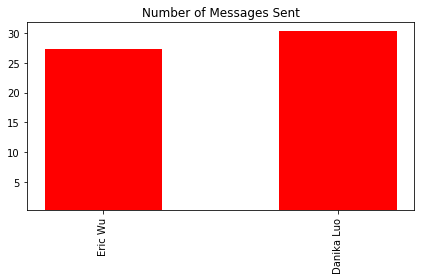

In [7]:
plot_num_messages(67)

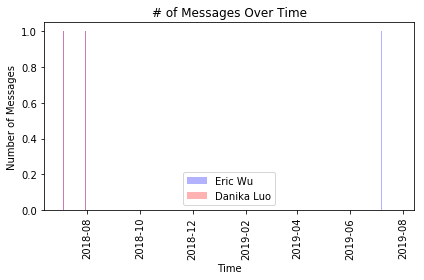

In [8]:
plot_histogram_time(67)

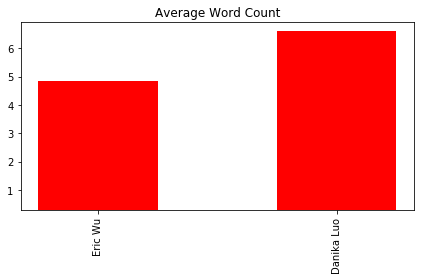

In [9]:
plot_histogram_words(67)